# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Dudi Nurdiyansah]
- **Email:** [m271b4ky1187@bangkit.academy]
- **ID Dicoding:** [dudi_nurdiyansah_usFA]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kategori produk mana yang mendorong penjualan terbanyak?
- Pertanyaan 2: Bagaimana tren penjualan untuk kategori produk dengan penjualan terbanyak?
- Pertanyaan 3: Kategori produk mana yang mendapatkan penjualan terendah?
- Pertanyaan 4: Bagaimana rata-rata tren penjualan produk secara keseluruhan?
- Pertanyaan 5: Jenis pembayaran mana yang paling dominan digunakan oleh customers?
- Pertanyaan 6: Apa status pesanan yang paling umum dan bagaimana distribusi status pesanan tersebut?
- Pertanyaan 7: Kota mana yang memiliki kontribusi terbesar terhadap jumlah pelanggan, dan bagaimana strategi pemasaran dapat disesuaikan untuk meningkatkan pangsa pasar di kota-kota lainnya?
- Pertanyaan 8: Apa kategori produk dengan rating ulasan tertinggi dan terendah?
- Pertanyaan 9: Apakah ada korelasi antara nilai review ulasan dan biaya pengiriman?
- Pertanyaan 10 : Di kota mana konsentrasi seller paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import streamlit as st

In [3]:
st.title("Proyek Analisis Data")

2024-10-04 04:53:25.146 
  command:

    streamlit run C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

## Data Wrangling

### Gathering Data

#### Data Customers

In [2]:
data_customers = pd.read_csv('customers_dataset.csv')
data_customers.head()

customer_id                customer_unique_id  \
0  48d8c257cbd8447a8503e559a8b8cca9  f8af7fabb3e9e70beee01db243cd3eaa   
1  27988adec5e98cba7d43e24cd165d5cf  a6e5393c3e4bad6306694167e0f224e8   
2  5eda0e0b4e9d11a87094681a4597f90c  cc4adf86e974ab9714a4646e2c77719d   
3  726989efae592e4f204e67b4b893d01d  dadc1f595b611ccbb8a6894bd2203be2   
4  0980d1bf97df05137f76ff388b1b2ec9  b659edeb7cfa20089146b486dbb66e87   

   customer_zip_code_prefix   customer_city customer_state  
0                     58035     joao pessoa             PB  
1                     22620  rio de janeiro             RJ  
2                      5871       sao paulo             SP  
3                     36930       simonesia             MG  
4                     96410            bage             RS

#### Data Geolocations

In [3]:
data_geolocations = pd.read_csv('geolocation_dataset.csv')
data_geolocations.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        89595       -26.906445       -51.410635   
1                        76980       -12.740810       -60.142949   
2                        29025       -20.317504       -40.355407   
3                         4296       -23.621852       -46.603648   
4                        12421       -22.953357       -45.478992   

  geolocation_city geolocation_state  
0     salto veloso                SC  
1          vilhena                RO  
2          vitoria                ES  
3        sao paulo                SP  
4  pindamonhangaba                SP

#### Data Order Items

In [4]:
data_order_items = pd.read_csv('order_items_dataset.csv')
data_order_items.head()

order_id  order_item_id  \
0  80271f9179f6d8df256f964fc2cc1c6a              1   
1  8f3987cbcd3306eab72ae123764da5fb              1   
2  93f6802eddf412ddaece53aba01d1db3              1   
3  81d8e5d965001789e9f871f474afaad5              1   
4  512e098833ea4453e3b2145f5347e9d9              1   

                         product_id                         seller_id  \
0  0f4d27b820e317c951649da022895e0e  b274baf5bbd142410eb2958cf685d684   
1  f08c59bc335a381d2b015c4efdc6dae3  cca3071e3e9bb7d12640c9fbe2301306   
2  e4ad97ce352e46bebac92018f6ed976d  3d871de0142ce09b7081e2b9d1733cb1   
3  b47e709bbae4533598f806553accd469  96493fab2fbb13a14d0c0e8772eef5c3   
4  4473f3e5c65952b074ef987fa5c24662  ea8482cd71df3c1969d7b9473ff13abc   

   shipping_limit_date   price  freight_value  
0  2018-06-22 01:17:13   79.00          33.93  
1  2017-12-07 09:17:23   50.90          12.70  
2  2017-05-08 13:55:22   79.00          13.13  
3  2018-03-21 18:49:09  269.00          10.24  
4  2017-12-29 01:30:51   29.99          15.10

#### Data Order Payments

In [5]:
data_order_payments = pd.read_csv('order_payments_dataset.csv')
data_order_payments.head()

order_id  payment_sequential payment_type  \
0  85485db1f11cb496d2fbd2def0d397a3                   1  credit_card   
1  4d95703047b8a80cf5796b7478900ec7                   1  credit_card   
2  0a979eab29ef830d6363887a00907fb3                   1       boleto   
3  803aa4666b8c108ee27e65f64ad038fc                   1  credit_card   
4  1def557ed62966137b261a8229f74e39                   1  credit_card   

   payment_installments  payment_value  
0                     1          27.72  
1                     3         103.50  
2                     1          93.60  
3                     4          98.67  
4                     3          33.61

#### Data Order Reviews

In [6]:
data_order_reviews = pd.read_csv('order_reviews_dataset.csv')
data_order_reviews.head()

review_id                          order_id  \
0  1eefff6f9c5d41506b0cd9a28ba00c53  52619537cf1e982e097feae63cd2e083   
1  e5ee9c9f7b9098114cb6dab5d587cf09  24f18122273caa6950e256dcb2d2f7a7   
2  2e17489d5c4987a9010459ad3eb50c59  2e87d5b27ba52796b2b5250002426561   
3  9b61c67a71f8d863a758cd42e787226a  b8b2320bc7303abbc19c6976fe8b2fd6   
4  00d2ce06a3d065f956720f6a134eb454  982b3bee67e10358cdfe18e0bbee9d08   

   review_score review_comment_title  \
0             5                  NaN   
1             5                  NaN   
2             1           Muito ruim   
3             5                  NaN   
4             5               Otimo!   

                              review_comment_message review_creation_date  \
0                                                NaN  2017-03-30 00:00:00   
1                                                NaN  2018-08-01 00:00:00   
2  O produto foi entregue em outra cor. \r\nSolic...  2018-06-22 00:00:00   
3                                                NaN  2017-11-25 00:00:00   
4                          Loja muito boa! Parabens!  2018-05-05 00:00:00   

  review_answer_timestamp  
0     2017-03-30 21:10:13  
1     2018-08-01 19:48:50  
2     2018-06-24 01:32:44  
3     2017-12-14 11:13:24  
4     2018-05-05 23:40:33

#### Data Orders

In [7]:
data_orders = pd.read_csv('orders_dataset.csv')
data_orders.head()

order_id                       customer_id  \
0  b8f3f5cc5ad4103e17b5d0bd4266d69d  39b95a2690bce9433140be3c4cdcce38   
1  dbd4885aa71d304f95eb40c67bfbec35  323a81cf20fb536503c017cfd5c2d54f   
2  bb6ad5da18745c25ea9a43797598dfb7  c2a1a15a515ad0cc603955060a46a30c   
3  bf1f8df62b104db3de943cf23ed71435  f09da4a140386d7af34fb63abe90d9eb   
4  42ed2aeb956c92e3c3bb6933ecea1d89  7e176ddb04e521f4e57421aa4ab5d5a2   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-05-06 17:25:10  2017-05-06 17:42:09   
1    delivered      2017-01-23 18:40:23  2017-01-23 18:50:18   
2    delivered      2018-01-09 23:19:04  2018-01-10 10:32:12   
3    delivered      2018-05-25 08:16:47  2018-05-25 08:36:53   
4    delivered      2017-07-25 10:34:54  2017-07-25 10:50:16   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-05-10 03:27:55           2017-05-27 07:07:59   
1          2017-01-27 07:05:48           2017-02-07 17:29:32   
2          2018-01-10 20:48:34           2018-01-11 16:36:27   
3          2018-05-25 13:35:00           2018-06-01 21:10:47   
4          2017-07-26 14:53:36           2017-08-03 22:13:02   

  order_estimated_delivery_date  
0           2017-05-31 00:00:00  
1           2017-03-02 00:00:00  
2           2018-01-26 00:00:00  
3           2018-06-12 00:00:00  
4           2017-08-24 00:00:00

#### Data Product Category

In [8]:
data_product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
data_product_category_name_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

#### Data Products

In [9]:
data_products = pd.read_csv('products_dataset.csv')
data_products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

#### Data Sellers

In [10]:
data_sellers = pd.read_csv('sellers_dataset.csv')
data_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

**Insight:**
- Terdapat 9 dataset yaitu : Data Customers, Data Geolocations, Data Order Items, Data Payments, Data Order Reviews, Data Orders, Data Product Category Name Translation, Data Products, dan Data Sellers
- Pada data-data tersebut terdapat atribut yang memiliki hubungan satu sama lain yang nanti akan dilakukan join pada saat EDA.

**English:**

- There are 9 datasets: Data Customers, Data Geolocations, Data Order Items, Data Payments, Data Order Reviews, Data Orders, Data Product Category Name Translation, Data Products, and Data Sellers.
- In these datasets, there are attributes that are related to each other, which will later be joined during the EDA (Exploratory Data Analysis).

### Assessing Data

In [11]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24860 entries, 0 to 24859
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               24860 non-null  object
 1   customer_unique_id        24860 non-null  object
 2   customer_zip_code_prefix  24860 non-null  int64 
 3   customer_city             24860 non-null  object
 4   customer_state            24860 non-null  object
dtypes: int64(1), object(4)
memory usage: 971.2+ KB


In [12]:
data_customers.describe()

customer_zip_code_prefix
count              24860.000000
mean               35247.423290
std                29977.422754
min                 1004.000000
25%                11250.000000
50%                24341.000000
75%                59088.500000
max                99980.000000

In [13]:
data_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
data_geolocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50008 entries, 0 to 50007
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  50008 non-null  int64  
 1   geolocation_lat              50008 non-null  float64
 2   geolocation_lng              50008 non-null  float64
 3   geolocation_city             50008 non-null  object 
 4   geolocation_state            50008 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ MB


In [15]:
data_geolocations.describe()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 50008.000000     50008.000000     50008.000000
mean                  36808.151696       -21.182569       -46.415585
std                   30586.657121         5.731109         4.279385
min                    1001.000000       -33.692196       -72.680328
25%                   11441.000000       -23.605133       -48.608109
50%                   27126.500000       -22.917449       -46.639509
75%                   64217.250000       -19.990065       -43.765996
max                   99980.000000        45.065933         9.341528

In [16]:
data_geolocations.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
data_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             14081 non-null  object 
 1   order_item_id        14081 non-null  int64  
 2   product_id           14081 non-null  object 
 3   seller_id            14081 non-null  object 
 4   shipping_limit_date  14081 non-null  object 
 5   price                14081 non-null  float64
 6   freight_value        14081 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 770.2+ KB


In [18]:
data_order_items.describe()

order_item_id         price  freight_value
count   14081.000000  14081.000000   14081.000000
mean        1.201548    119.639460      19.996512
std         0.726625    181.550474      15.751645
min         1.000000      1.200000       0.000000
25%         1.000000     39.900000      13.000000
50%         1.000000     74.900000      16.200000
75%         1.000000    134.000000      21.150000
max        19.000000   4590.000000     314.020000

In [19]:
data_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
data_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25972 entries, 0 to 25971
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              25972 non-null  object 
 1   payment_sequential    25972 non-null  int64  
 2   payment_type          25972 non-null  object 
 3   payment_installments  25972 non-null  int64  
 4   payment_value         25972 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1014.7+ KB


In [21]:
data_order_payments.describe()

payment_sequential  payment_installments  payment_value
count        25972.000000          25972.000000   25972.000000
mean             1.095372              2.846643     154.210923
std              0.702826              2.675039     208.513981
min              1.000000              1.000000       0.000000
25%              1.000000              1.000000      56.682500
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     172.620000
max             27.000000             24.000000    4445.500000

In [22]:
data_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
data_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12403 entries, 0 to 12402
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                12403 non-null  object
 1   order_id                 12403 non-null  object
 2   review_score             12403 non-null  int64 
 3   review_comment_title     1422 non-null   object
 4   review_comment_message   5083 non-null   object
 5   review_creation_date     12403 non-null  object
 6   review_answer_timestamp  12403 non-null  object
dtypes: int64(1), object(6)
memory usage: 678.4+ KB


In [24]:
data_order_reviews.describe()

review_score
count  12403.000000
mean       4.080223
std        1.354905
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

In [25]:
data_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       10981
review_comment_message      7320
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       12430 non-null  object
 1   customer_id                    12430 non-null  object
 2   order_status                   12430 non-null  object
 3   order_purchase_timestamp       12430 non-null  object
 4   order_approved_at              12413 non-null  object
 5   order_delivered_carrier_date   12205 non-null  object
 6   order_delivered_customer_date  12062 non-null  object
 7   order_estimated_delivery_date  12430 non-null  object
dtypes: object(8)
memory usage: 777.0+ KB


In [27]:
data_orders.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 17
order_delivered_carrier_date     225
order_delivered_customer_date    368
order_estimated_delivery_date      0
dtype: int64

In [28]:
data_orders.describe()

order_id                       customer_id  \
count                              12430                             12430   
unique                             12430                             12430   
top     b8f3f5cc5ad4103e17b5d0bd4266d69d  39b95a2690bce9433140be3c4cdcce38   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         12430                    12430                12413   
unique            6                    12427                12257   
top       delivered      2017-07-18 09:57:34  2018-03-23 02:27:56   
freq          12062                        2                    3   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         12205                         12062   
unique                        11792                         12052   
top             2018-05-09 15:48:00           2017-12-23 15:19:15   
freq                              5                             2   

       order_estimated_delivery_date  
count                          12430  
unique                           419  
top              2018-08-16 00:00:00  
freq                              78

In [29]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
data_products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [31]:
data_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [32]:
data_product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [33]:
data_product_category_name_translation.describe()

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

In [34]:
data_product_category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [35]:
data_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
data_sellers.describe()

seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

In [37]:
data_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Insight:**
- Pada Data Order Reviews, terdapat atribut review_comment_title sebanyak 87656 memiliki value null dan review_comment_message sebanyak 58247 value null sehingga diperlukan penyesuaian pada saat Cleaning Data.
- Pada Data Orders, terdapat atribut order_approved_at sebanyak 160 memiliki value null, order_delivered_carrier_date sebanyak 1783, dan order_delivered_customer_date sebanyak 2965.
- Data product pada atribut product_category_name sebanyak 610 memiliki value null, product_name_lenght sebanyak 610, product_description_lenght sebanyak 610, dan product_photos_qty   sebanyak 610 value.

**English:**
- In the Data Order Reviews, there are attributes: review_comment_title with 87,656 null values and review_comment_message with 58,247 null values, requiring adjustments during the data cleaning process.
- In the Data Orders, there are attributes: order_approved_at with 160 null values, order_delivered_carrier_date with 1,783 null values, and order_delivered_customer_date with 2,965 null values.
- In the Data Products, the attributes have null values as follows: product_category_name with 610 null values, product_name_length with 610 null values, product_description_length with 610 null values, and product_photos_qty with 610 null values.

### Cleaning Data

In [115]:
# Mengganti nilai null dengan "tidak mencantumkan"
data_order_reviews['review_comment_title'] = data_order_reviews['review_comment_title'].fillna('tidak mencantumkan')
data_order_reviews['review_comment_message'] = data_order_reviews['review_comment_message'].fillna('tidak mencantumkan')

# Memeriksa kembali jumlah nilai null setelah penggantian
print(data_order_reviews.isnull().sum())


review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [116]:
# Mengganti nilai null dengan "data tidak tersedia"
data_orders['order_approved_at'] = data_orders['order_approved_at'].fillna('data tidak tersedia')
data_orders['order_delivered_carrier_date'] = data_orders['order_delivered_carrier_date'].fillna('data tidak tersedia')
data_orders['order_delivered_customer_date'] = data_orders['order_delivered_customer_date'].fillna('data tidak tersedia')

# Memeriksa kembali jumlah nilai null setelah penggantian
print(data_orders.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [117]:
# Mengganti nilai null dengan "tidak ada data"
data_products['product_category_name'] = data_products['product_category_name'].fillna('tidak ada data')
data_products['product_name_lenght'] = data_products['product_name_lenght'].fillna('tidak ada data')
data_products['product_description_lenght'] = data_products['product_description_lenght'].fillna('tidak ada data')
data_products['product_photos_qty'] = data_products['product_photos_qty'].fillna('tidak ada data')
data_products['product_weight_g'] = data_products['product_weight_g'].fillna('tidak ada data')
data_products['product_length_cm'] = data_products['product_length_cm'].fillna('tidak ada data')
data_products['product_height_cm'] = data_products['product_height_cm'].fillna('tidak ada data')
data_products['product_width_cm'] = data_products['product_width_cm'].fillna('tidak ada data')

# Memeriksa kembali jumlah nilai null setelah penggantian
print(data_products.isnull().sum())


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight:**
- Kolom review_comment_title dan review_comment_message pada Data Order Reviews diisi dengan nilai "tidak mencantumkan" pada value yang null.
- Kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date pada Data Orders diisi dengan nilai "data tidak tersedia" pada value yang null.
- Kolom pada Data Products, yaitu product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm diisi dengan nilai "tidak ada data" pada value yang null.

**English:**

- The columns review_comment_title and review_comment_message in the Data Order Reviews are filled with the value "tidak mencantumkan" for null values.
- The columns order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date in the Data Orders are filled with the value "data tidak tersedia" for null values.
- In the Data Products, the columns product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, and product_width_cm are filled with the value "tidak ada data" for null values.

## Exploratory Data Analysis (EDA)

### Langkah EDA dibawah ini dilakukan untuk mengetahui apakah untuk setiap dataset memiliki hubungan satu dengan yang lainnya.

### Following EDA steps are conducted to determine whether each dataset has relationships with one another.

#### Join Data Customers to Oders

In [118]:
customers_orders = pd.merge(data_customers, data_orders, on="customer_id")
customers_orders.head()


customer_id                customer_unique_id  \
0  63523bbb461dd0b8fffa47e82833533c  9fb020faa1dfc7cc66b648e6a8ef0ca0   
1  c0451262dd7eda80d7fdc0277e3a6326  1b94082edaec2e4ae13bbf3510969004   
2  b741533955f92986d2f7cd6a241a889a  41b052c13c403f02d91767f64051a2e5   
3  76456466e488ebe1a52338c4df13f15f  532b8c0c2f22c1f0833891f4d3cac381   
4  3807775dbc0ada986e045cbfca95acff  7c83e556e8b9fbbc81bf61d7a1c3bd89   

   customer_zip_code_prefix customer_city customer_state  \
0                     14784      barretos             SP   
1                     24456   sao goncalo             RJ   
2                      9195   santo andre             SP   
3                     16072     aracatuba             SP   
4                     11440       guaruja             SP   

                           order_id order_status order_purchase_timestamp  \
0  8d6a24500da2c0b69d6e7fa5c28e9c09    delivered      2018-08-18 15:41:34   
1  6139a798f92b14ad667f3a8fb8f78c4c    delivered      2018-02-26 07:16:26   
2  5884e0cadffe0a4162c2bc9456de17f3    delivered      2018-02-04 21:42:07   
3  68126438e25973e9d716ab0e2485ae05    delivered      2018-04-12 18:12:25   
4  db38b153b053e72dea0f69d14d429ac6    delivered      2017-07-24 21:55:46   

     order_approved_at order_delivered_carrier_date  \
0  2018-08-18 15:55:22          2018-08-20 15:35:00   
1  2018-02-26 08:00:21          2018-02-28 14:22:15   
2  2018-02-06 05:31:43          2018-02-07 00:52:05   
3  2018-04-14 02:30:41          2018-04-18 01:24:38   
4  2017-07-26 02:16:18          2017-07-28 14:49:54   

  order_delivered_customer_date order_estimated_delivery_date  
0           2018-08-23 18:16:51           2018-09-06 00:00:00  
1           2018-04-20 18:46:42           2018-03-21 00:00:00  
2           2018-02-07 15:16:43           2018-02-21 00:00:00  
3           2018-04-24 16:22:05           2018-05-07 00:00:00  
4           2017-08-02 13:42:07           2017-08-15 00:00:00

- Key: customer_id

- Tujuan: Menyambungkan informasi customer dengan order yang dilakukan.

#### Join Data Order to Oders Item

In [119]:
orders_items = pd.merge(data_orders, data_order_items, on="order_id")
orders_items.head()


order_id                       customer_id  \
0  621d4b50a57e7b6e6d047671cb86cdc1  8013a33161d0b154e440f3ecb285dd41   
1  9660767a8d96cb12bf8bd94b3797bb75  b1407d31724e2a3f513877e516bb0c47   
2  69a575f85187107c2ae4464a6e2ccf80  1e636027145a885dffb87246dc57ff4b   
3  73863aca434e1d117e45109bea6f1937  f3f7e581618408da1e8d5ebe236082b3   
4  0f1755872b47fe8564531daeef356987  0ae2c954e68238f2a8f8ff8b24766bc7   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-06-24 13:03:56  2018-06-24 13:18:41   
1    delivered      2018-04-03 21:19:32  2018-04-03 21:30:12   
2    delivered      2018-01-16 20:24:56  2018-01-16 20:32:19   
3     canceled      2018-07-29 00:05:24  2018-07-29 00:15:14   
4    delivered      2018-04-16 12:46:09  2018-04-16 14:11:47   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-06-25 14:48:00           2018-06-29 17:07:48   
1          2018-04-04 23:47:40           2018-04-17 13:26:42   
2          2018-01-18 21:41:27           2018-01-29 16:53:01   
3          data tidak tersedia           data tidak tersedia   
4          2018-04-17 14:34:30           2018-04-20 15:48:50   

  order_estimated_delivery_date  order_item_id  \
0           2018-07-18 00:00:00              1   
1           2018-04-27 00:00:00              1   
2           2018-02-09 00:00:00              2   
3           2018-08-15 00:00:00              1   
4           2018-04-26 00:00:00              1   

                         product_id                         seller_id  \
0  291b39691d7d40a42f9e7d0920d9a21a  cb6c9f5888a7a090c75beaf615925792   
1  5a848e4ab52fd5445cdc07aab1c40e48  c826c40d7b19f62a09e2d7c5e7295ee2   
2  cc4683230056b8f1c0df24f7e335d3ca  ddd51ae8cda92f3995a51fc0f0f3eec7   
3  650e39eebfbf781051ea573d02d0342a  ce248b21cb2adc36282ede306b7660e5   
4  d6a95e3741f817881010aa71433051b5  d91fb3b7d041e83b64a00a3edfb37e4f   

   shipping_limit_date    price  freight_value  
0  2018-06-28 13:18:41    34.99          19.44  
1  2018-04-09 21:30:12   122.99          18.74  
2  2018-01-22 20:32:19    35.90          15.10  
3  2018-08-01 00:15:14  1669.87         171.88  
4  2018-04-20 14:11:47    44.10           7.87

- Key: order_id

- Tujuan: Menyambungkan detail order dengan item yang dibeli dalam order tersebut.

#### Join Data Order Payment to Order Dataset

In [120]:
orders_payments = pd.merge(data_order_payments, data_orders, on="order_id")
orders_payments.head()

order_id  payment_sequential payment_type  \
0  4a91a1ba7768e400ff40aad6730251ed                   1  credit_card   
1  64e1395d7ea3914c0f8a6706849e73ad                   1  credit_card   
2  ab1565bce2736095e4b347db4cfc071f                   2      voucher   
3  0ce17a5e9ad81a5eb5a948080e9b4332                   1       boleto   
4  14478695ea45a6076e05fb283a9cbdda                   1  credit_card   

   payment_installments  payment_value                       customer_id  \
0                    10         249.08  252eca59746ea50c35bbd4cee0fbd333   
1                     2         207.96  e4aed9317758d8d67a37d70936802791   
2                     1         100.00  381236979aa43bd28a692c065917393d   
3                     1          44.69  7f3751bed6fa577d36ce3a74179e992a   
4                     1          69.73  71193c50b73646f6a61379dfc2b25285   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-11-26 19:35:21  2017-11-28 19:35:49   
1    delivered      2018-05-03 20:37:41  2018-05-03 20:52:53   
2    delivered      2018-08-19 17:16:52  2018-08-20 12:35:14   
3    delivered      2018-01-11 22:23:46  2018-01-13 02:09:04   
4    delivered      2017-11-16 20:23:13  2017-11-16 20:46:28   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-12-06 01:52:59           2017-12-13 00:53:07   
1          2018-05-08 08:41:00           2018-05-11 20:34:49   
2          2018-08-23 14:35:00           2018-08-24 16:49:51   
3          2018-01-22 18:49:02           2018-02-08 16:48:59   
4          2017-11-17 20:44:41           2017-11-28 21:28:55   

  order_estimated_delivery_date  
0           2017-12-21 00:00:00  
1           2018-05-28 00:00:00  
2           2018-08-29 00:00:00  
3           2018-02-20 00:00:00  
4           2017-12-05 00:00:00

- Key: order_id

- Tujuan: Menghubungkan order dengan detail pembayaran yang dilakukan untuk order tersebut.

#### Join Data Customers to Order Geolocation

In [121]:
customers_geolocations = pd.merge(data_customers, data_geolocations, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix")
customers_geolocations.head()

customer_id                customer_unique_id  \
0  48d8c257cbd8447a8503e559a8b8cca9  f8af7fabb3e9e70beee01db243cd3eaa   
1  48d8c257cbd8447a8503e559a8b8cca9  f8af7fabb3e9e70beee01db243cd3eaa   
2  48d8c257cbd8447a8503e559a8b8cca9  f8af7fabb3e9e70beee01db243cd3eaa   
3  48d8c257cbd8447a8503e559a8b8cca9  f8af7fabb3e9e70beee01db243cd3eaa   
4  500d19ce7db9f10540bb6a251379cc6f  ee14b494d75d6bfdfb18c3456f37ee2f   

   customer_zip_code_prefix customer_city customer_state  \
0                     58035   joao pessoa             PB   
1                     58035   joao pessoa             PB   
2                     58035   joao pessoa             PB   
3                     58035   joao pessoa             PB   
4                     58035   joao pessoa             PB   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        58035        -7.071561       -34.836152   
1                        58035        -7.068930       -34.847517   
2                        58035        -7.059597       -34.847110   
3                        58035        -7.067661       -34.842708   
4                        58035        -7.071561       -34.836152   

  geolocation_city geolocation_state  
0      joao pessoa                PB  
1      joao pessoa                PB  
2      joao pessoa                PB  
3      joao pessoa                PB  
4      joao pessoa                PB

- Key: customer_zip_code_prefix = geolocation_zip_code_prefix

- Tujuan: Menghubungkan customer dengan informasi geolokasi (latitude dan longitude).

#### Join Data Sellers to Order Geolocation

In [122]:
sellers_geolocations = pd.merge(data_sellers, data_geolocations, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix")
sellers_geolocations.head()

seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
2  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
3  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
4  e0eabded302882513ced4ea3eb0c7059                   13023    campinas   

  seller_state  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0           SP                        13023       -22.891515       -47.060648   
1           SP                        13023       -22.894933       -47.061504   
2           SP                        13023       -22.890203       -47.046876   
3           SP                        13023       -22.890008       -47.046823   
4           SP                        13023       -22.891515       -47.060648   

  geolocation_city geolocation_state  
0         campinas                SP  
1         campinas                SP  
2         campinas                SP  
3         campinas                SP  
4         campinas                SP

- Key: seller_zip_code_prefix = geolocation_zip_code_prefix

- Tujuan: Menghubungkan seller dengan informasi geolokasi.

#### Mengetahui Waktu pengiriman

In [123]:
print(data_orders['order_delivered_customer_date'].unique())
print(data_orders['order_delivered_carrier_date'].unique())

['2017-05-27 07:07:59' '2017-02-07 17:29:32' '2018-01-11 16:36:27' ...
 '2018-07-25 14:42:49' '2018-08-15 18:55:45' '2017-02-21 10:57:37']
['2017-05-10 03:27:55' '2017-01-27 07:05:48' '2018-01-10 20:48:34' ...
 '2018-07-23 16:06:00' '2018-08-08 13:29:00' '2017-02-07 05:09:29']


In [124]:
data_orders['order_delivered_customer_date'] = data_orders['order_delivered_customer_date'].replace("data tidak tersedia", pd.NaT)
data_orders['order_delivered_carrier_date'] = data_orders['order_delivered_carrier_date'].replace("data tidak tersedia", pd.NaT)


In [125]:
data_orders['order_delivered_customer_date'] = pd.to_datetime(data_orders['order_delivered_customer_date'], errors='coerce')
data_orders['order_delivered_carrier_date'] = pd.to_datetime(data_orders['order_delivered_carrier_date'], errors='coerce')


In [126]:
delivery_time = data_orders['order_delivered_customer_date'] - data_orders['order_delivered_carrier_date']
delivery_time_days = delivery_time.dt.total_seconds() 
data_orders['delivery_time'] = round(delivery_time_days / 86400)


In [127]:
# Mengganti nilai yang tidak valid dengan NaT
data_orders['order_delivered_customer_date'] = data_orders['order_delivered_customer_date'].replace("data tidak tersedia", pd.NaT)
data_orders['order_delivered_carrier_date'] = data_orders['order_delivered_carrier_date'].replace("data tidak tersedia", pd.NaT)

# Mengubah kolom menjadi format datetime
data_orders['order_delivered_customer_date'] = pd.to_datetime(data_orders['order_delivered_customer_date'], errors='coerce')
data_orders['order_delivered_carrier_date'] = pd.to_datetime(data_orders['order_delivered_carrier_date'], errors='coerce')

# Menghitung waktu pengiriman
delivery_time = data_orders['order_delivered_customer_date'] - data_orders['order_delivered_carrier_date']
delivery_time_days = delivery_time.dt.total_seconds() 

# Menambahkan kolom baru 'delivery_time' dalam satuan hari ke dalam dataset
data_orders['delivery_time'] = round(delivery_time_days / 86400)

# Menampilkan hasil
print(data_orders['delivery_time'].head())


0    17.0
1    11.0
2     1.0
3     7.0
4     8.0
Name: delivery_time, dtype: float64


#### Jumlah order berdasarkan kota

In [128]:
customers_orders.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

customer_city  order_id
0              sao paulo       488
1         rio de janeiro       201
2         belo horizonte        89
3               brasilia        55
4               curitiba        55
5           porto alegre        50
6               salvador        47
7               campinas        42
8              guarulhos        38
9  sao bernardo do campo        33

#### Join Data Orders to Order Items and Data Products

In [129]:
orders_items = pd.merge(data_orders, data_order_items, on="order_id")
orders_items_products = pd.merge(orders_items, data_products, on="product_id")
orders_items_products_payments = pd.merge(orders_items_products, data_order_payments, on="order_id")

orders_items_products_payments.head()


order_id                       customer_id  \
0  b8790ac596ab7435a12347fcb3a34341  528ac204a31cd67895d44da1f6f994bb   
1  01882618ede11253381513166b49429e  8f7ecb4570dccd8aeb216db7823da1de   
2  45c653bdeb327fde86e2a52bd3d33e89  477d25a94a52bc31e37ca4c2bd589cb0   
3  0a95a336d341691ae0e6359713af3cd3  2f533dfc8d858dc1947251e5d0d8b157   
4  d09d9dcfc60768eca86d23524469aaac  c41453f7bd7d6b8de47dabe95160ffd4   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-02-20 18:05:31  2018-02-22 02:15:34   
1    delivered      2018-06-24 10:53:21  2018-06-24 11:58:10   
2    delivered      2018-06-04 21:49:36  2018-06-04 22:11:14   
3    delivered      2018-01-27 15:05:15  2018-01-27 15:17:23   
4    delivered      2018-03-22 17:45:00  2018-03-22 18:05:21   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-02-22 20:23:31           2018-03-06 00:21:45   
1          2018-06-26 09:03:00           2018-06-29 14:16:53   
2          2018-06-05 13:23:00           2018-06-11 16:18:38   
3          2018-01-30 02:05:26           2018-02-05 15:33:20   
4          2018-03-23 18:34:48           2018-03-29 00:05:28   

  order_estimated_delivery_date  delivery_time  order_item_id  ...  \
0           2018-03-16 00:00:00           11.0              1  ...   
1           2018-07-23 00:00:00            3.0              1  ...   
2           2018-07-13 00:00:00            6.0              1  ...   
3           2018-02-23 00:00:00            7.0              1  ...   
4           2018-04-11 00:00:00            5.0              1  ...   

  product_description_lenght product_photos_qty product_weight_g  \
0             tidak ada data     tidak ada data            400.0   
1                      953.0                3.0            500.0   
2                      953.0                3.0            500.0   
3                     2848.0                2.0            200.0   
4                      771.0                1.0          12000.0   

   product_length_cm  product_height_cm product_width_cm payment_sequential  \
0               20.0               12.0             15.0                  1   
1               30.0               12.0             17.0                  1   
2               30.0               12.0             17.0                  1   
3               16.0                4.0             11.0                  1   
4               45.0               35.0             45.0                  1   

  payment_type payment_installments payment_value  
0       boleto                    1        138.60  
1  credit_card                    1         48.21  
2  credit_card                    1         48.13  
3  credit_card                    4        305.68  
4  credit_card                    4        287.77  

[5 rows x 27 columns]

**Insight:**
- Dilakukan join pada beberapa dataset untuk digunakan pada section visualization.
- Memproses data tanggal pengiriman dengan mengganti entri yang tidak valid dengan NaT, mengonversi kolom tanggal ke format datetime, menghitung waktu pengiriman dalam satuan hari, dan menambahkannya sebagai kolom baru ke dalam dataset.
- Memproses informasi tentang kota-kota yang paling aktif dalam melakukan pembelian, yang dapat membantu dalam analisis lebih lanjut dalam visualisai.
- Menggabungkan beberapa Data terkait order, item, product, dan payment untuk menghasilkan DataFrame mengenai informasi lengkap tentang setiap pesanan, termasuk detail item, produk, dan metode pembayaran yang digunakan, memungkinkan analisis yang lebih dalam bentuk visualisasi.

**English:**
- Joined several datasets for use in the visualization section.
- Processed delivery date data by replacing invalid entries with NaT, converting date columns to datetime format, calculating delivery time in days, and adding it as a new column to the dataset.
- Processed information about the most active cities in making purchases, which can aid in further analysis in visualizations.
- Merged several data related to orders, items, products, and payments to produce a DataFrame with comprehensive information about each order, including item details, products, and payment methods used, enabling deeper analysis in the form of visualizations.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk mana yang mendorong penjualan terbanyak?

5 Kategori dengan Penjualan Tertinggi:
bed_bath_table           1415
health_beauty            1199
sports_leisure           1051
furniture_decor          1046
computers_accessories     996
Name: product_category_name_english, dtype: int64


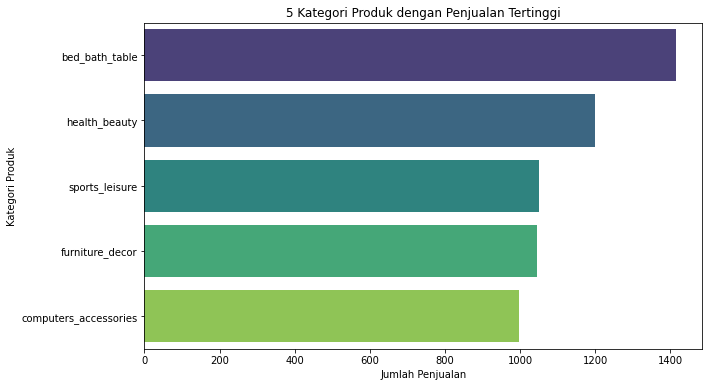

In [130]:
# Menggabungkan data items dan produk dengan kategori
items_products = pd.merge(data_order_items, data_products, on="product_id")
items_products_category = pd.merge(items_products, data_product_category_name_translation, on="product_category_name")

# Menghitung penjualan per kategori untuk semua kategori
all_category_sales = items_products_category['product_category_name_english'].value_counts()

# Mengambil 5 kategori dengan jumlah penjualan tertinggi
top_category_sales = all_category_sales.nlargest(5)

# Menampilkan 5 kategori tertinggi
print("5 Kategori dengan Penjualan Tertinggi:")
print(top_category_sales)

# Plot bar chart untuk 5 kategori tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(x=top_category_sales.values, y=top_category_sales.index, palette="viridis")
plt.title("5 Kategori Produk dengan Penjualan Tertinggi")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kategori Produk")
plt.show()




### Pertanyaan 2: Bagaimana tren penjualan untuk kategori produk dengan penjualan terbanyak?

<Figure size 864x576 with 0 Axes>

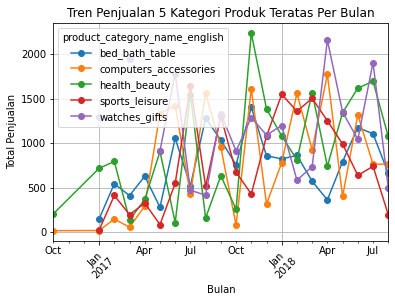

In [131]:
# Menggabungkan data order items dengan orders untuk mendapatkan data timestamp
orders_items = pd.merge(data_order_items, data_orders, on="order_id")

# Pastikan kolom 'order_purchase_timestamp' ada dan ubah ke format datetime
orders_items['order_purchase_timestamp'] = pd.to_datetime(orders_items['order_purchase_timestamp'])

# Tambahkan kolom bulan setelah kolom dikonversi ke datetime
orders_items['purchase_month'] = orders_items['order_purchase_timestamp'].dt.to_period('M')

# Menggabungkan dengan produk dan kategori
items_products_category = pd.merge(orders_items, data_products, on="product_id")
items_products_category = pd.merge(items_products_category, data_product_category_name_translation, on="product_category_name")

# Menghitung total penjualan per kategori
total_sales_per_category = items_products_category.groupby('product_category_name_english')['price'].sum()

# Mendapatkan 5 kategori produk teratas berdasarkan total penjualan
top_5_categories = total_sales_per_category.nlargest(5).index

# Memfilter hanya untuk 5 kategori teratas
filtered_items = items_products_category[items_products_category['product_category_name_english'].isin(top_5_categories)]

# Menghitung tren penjualan per kategori per bulan untuk 5 kategori teratas
monthly_sales_top_5 = filtered_items.groupby(['purchase_month', 'product_category_name_english'])['price'].sum().unstack()

# Plot line chart untuk tren penjualan 5 kategori teratas
plt.figure(figsize=(12,8))
monthly_sales_top_5.plot(marker='o')
plt.title("Tren Penjualan 5 Kategori Produk Teratas Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Pertanyaan 3:  Kategori produk mana yang mendapatkan penjualan terendah?

5 Kategori dengan Penjualan Terendah:
fashion_sport              1
fashion_underwear_beach    1
books_imported             1
dvds_blu_ray               1
tablets_printing_image     1
Name: product_category_name_english, dtype: int64


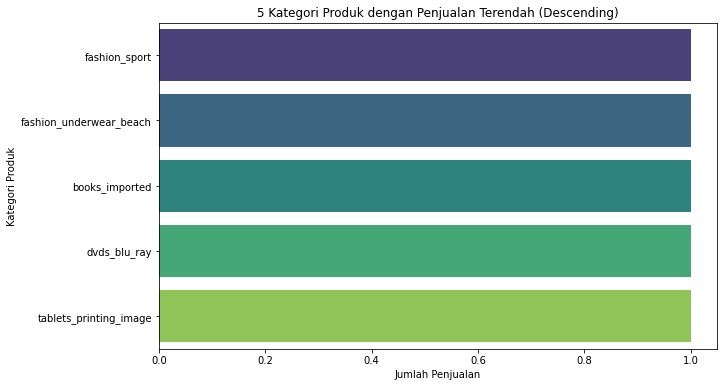

In [132]:
# Menghitung penjualan per kategori untuk semua kategori
all_category_sales = items_products_category['product_category_name_english'].value_counts()

# Mengambil 5 kategori dengan jumlah penjualan terendah dan mengurutkannya secara descending
lowest_category_sales = all_category_sales.nsmallest(5).sort_values(ascending=False)

# Menampilkan 5 kategori terendah
print("5 Kategori dengan Penjualan Terendah:")
print(lowest_category_sales)

# Plot bar chart untuk 5 kategori terendah
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_category_sales.values, y=lowest_category_sales.index, palette="viridis")
plt.title("5 Kategori Produk dengan Penjualan Terendah (Descending)")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kategori Produk")
plt.show()




### Pertanyaan 4:  Bagaimana rata-rata tren penjualan produk secara keseluruhan?

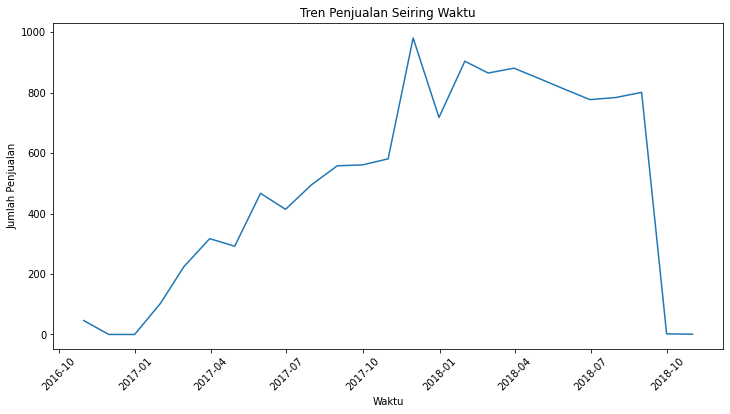

In [133]:
# Analisis Tren Penjualan 
data_orders['order_purchase_timestamp'] = pd.to_datetime(data_orders['order_purchase_timestamp'])
sales_trend = data_orders.resample('M', on='order_purchase_timestamp').size()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend)
plt.title('Tren Penjualan Seiring Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 5:  Jenis pembayaran mana yang paling dominan digunakan oleh customers?

Persentase setiap jenis pembayaran:
credit_card    73.758229
boleto         19.150209
voucher         5.535607
debit_card      1.555955
Name: payment_type, dtype: float64


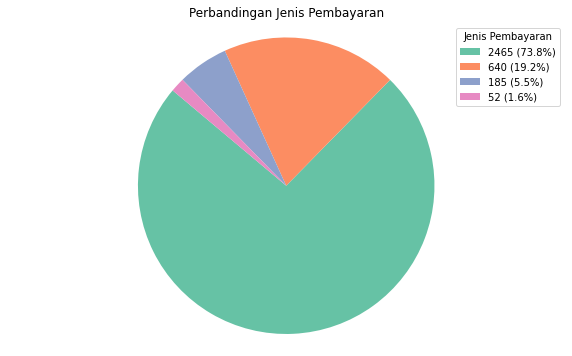

In [134]:
# Menghitung jumlah setiap jenis pembayaran
payment_counts = orders_payments['payment_type'].value_counts()

# Menampilkan persentase setiap jenis pembayaran
payment_percentage = (payment_counts / payment_counts.sum()) * 100
print("Persentase setiap jenis pembayaran:")
print(payment_percentage)

# Membuat pie chart 
plt.figure(figsize=(10, 6))
plt.pie(payment_counts, labels=None, startangle=140, colors=sns.color_palette("Set2"))

# Menambahkan legenda 
plt.legend(
    labels=[f'{count} ({percentage:.1f}%)' for count, percentage in zip(payment_counts, payment_percentage)],
    title="Jenis Pembayaran",
    loc="best"
)

plt.title("Perbandingan Jenis Pembayaran")
plt.axis('equal')  
plt.show()


### Pertanyaan 6 : Apa status pesanan yang paling umum dan bagaimana distribusi status pesanan tersebut?

Persentase setiap status pesanan:
delivered     97.485380
shipped        1.345029
canceled       0.701754
processing     0.292398
invoiced       0.175439
Name: order_status, dtype: float64


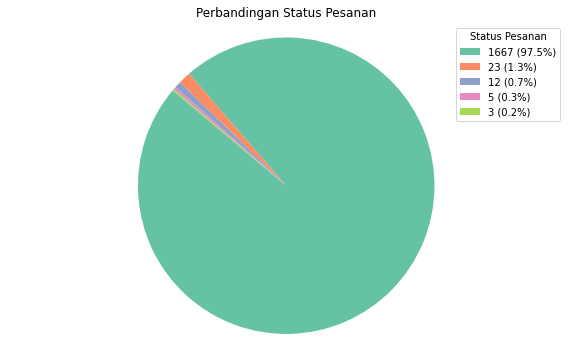

In [135]:
# Menghitung jumlah setiap status pesanan
order_status_counts = orders_items['order_status'].value_counts()

# Menampilkan persentase setiap status pesanan
order_status_percentage = (order_status_counts / order_status_counts.sum()) * 100
print("Persentase setiap status pesanan:")
print(order_status_percentage)

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(order_status_counts, labels=None, startangle=140, colors=sns.color_palette("Set2"))

# Menambahkan legenda 
plt.legend(
    labels=[f'{count} ({percentage:.1f}%)' for count, percentage in zip(order_status_counts, order_status_percentage)],
    title="Status Pesanan",
    loc="best"
)

plt.title("Perbandingan Status Pesanan")
plt.axis('equal')  # Menjaga pie chart tetap bulat
plt.show()

### Pertanyaan 7 : Kota mana yang memiliki kontribusi terbesar terhadap jumlah pelanggan, dan bagaimana strategi pemasaran dapat disesuaikan untuk meningkatkan pangsa pasar di kota-kota lainnya?

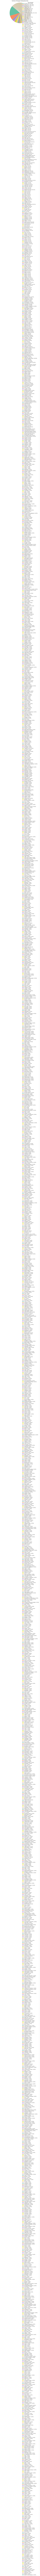

In [136]:
# Menghitung jumlah pelanggan per kota
customer_city_counts = data_customers['customer_city'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(customer_city_counts, startangle=140, colors=sns.color_palette("Set2"))

# Menambahkan legenda dengan persentase
plt.legend(
    labels=[f'{label}: {count} ({count / customer_city_counts.sum() * 100:.1f}%)' for label, count in zip(customer_city_counts.index, customer_city_counts)],
    title="Kota Pelanggan",
    loc="best"
)

plt.title("Distribusi Pelanggan Berdasarkan Kota")
plt.axis('equal')  
plt.show()



Jumlah pelanggan per kota:
sao paulo          3877
rio de janeiro     1743
belo horizonte      666
brasilia            520
curitiba            376
lain-lain         17678
Name: customer_city, dtype: int64


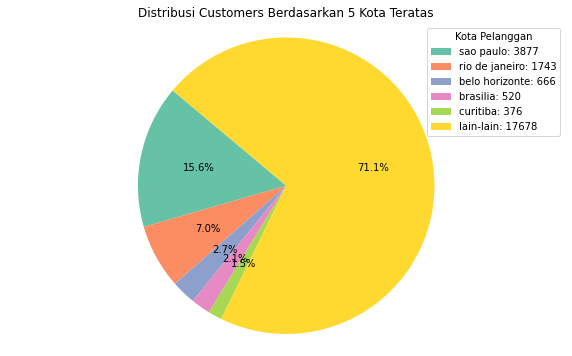

In [137]:
# Menghitung jumlah pelanggan per kota
customer_city_counts = data_customers['customer_city'].value_counts()

# Mengambil 5 kota teratas 
top_5_cities = customer_city_counts.head(5)
other_cities_count = customer_city_counts[5:].sum()  # Jumlah kota lainnya
top_5_cities['lain-lain'] = other_cities_count  # Menambahkan kategori 'kota lain'

# Menampilkan jumlah pelanggan per kota
print("Jumlah pelanggan per kota:")
print(top_5_cities)

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_5_cities, startangle=140, colors=sns.color_palette("Set2"), autopct='%1.1f%%')

# Menambahkan legenda
plt.legend(
    labels=[f'{label}: {count}' for label, count in zip(top_5_cities.index, top_5_cities)],
    title="Kota Pelanggan",
    loc="best"
)

plt.title("Distribusi Customers Berdasarkan 5 Kota Teratas")
plt.axis('equal')  
plt.show()

### Pertanyaan 8 : Apa kategori produk dengan rating ulasan tertinggi dan terendah?

5 Produk dengan Rata-rata Skor Ulasan Tertinggi:
                         product_id  review_score  product_category_name
0  00210e41887c2a8ef9f791ebc780cc36           5.0           beleza_saude
1  008cff0e5792219fae03e570f980b330           5.0          esporte_lazer
2  02ce467092b184e71d3967d29110adc1           5.0      moveis_escritorio
3  03233a6dca60544336766af227f78f09           5.0  utilidades_domesticas
4  03bb06cda40712fb8473f7962fb7d198           5.0        cama_mesa_banho


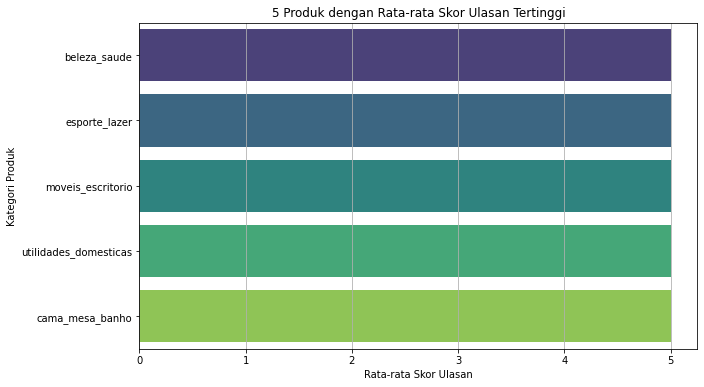

In [138]:
# Menggabungkan data Order Reviews dengan Order Items berdasarkan order_id
merged_reviews_items = pd.merge(data_order_reviews, data_order_items, on='order_id')

# Menggabungkan hasil dengan Data Products berdasarkan product_id
merged_all = pd.merge(merged_reviews_items, data_products, on='product_id')

# Menghitung rata-rata skor ulasan untuk setiap produk
average_review_scores = merged_all.groupby('product_id')['review_score'].mean().reset_index()

# Mengambil 5 produk dengan rata-rata skor ulasan tertinggi
top_5_average_scores = average_review_scores.nlargest(5, 'review_score')

# Menggabungkan dengan Data Products untuk mendapatkan nama kategori produk
top_5_average_scores = pd.merge(top_5_average_scores, data_products[['product_id', 'product_category_name']], on='product_id')

# Menampilkan hasil rata-rata skor
print("5 Produk dengan Rata-rata Skor Ulasan Tertinggi:")
print(top_5_average_scores[['product_id', 'review_score', 'product_category_name']])

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat bar plot menggunakan product_category_name sebagai y-label
sns.barplot(data=top_5_average_scores, x='review_score', y='product_category_name', palette="viridis")

# Menambahkan judul dan label
plt.title("5 Produk dengan Rata-rata Skor Ulasan Tertinggi")
plt.xlabel("Rata-rata Skor Ulasan")
plt.ylabel("Kategori Produk")
plt.grid(axis='x')

# Menampilkan plot
plt.show()




5 Produk dengan Rata-rata Skor Ulasan Terendah:
                         product_id  review_score        product_category_name
0  0152f69b6cf919bcdaf117aa8c43e5a2           1.0              cama_mesa_banho
1  040f34fe061b6024771f641fe922e782           1.0           relogios_presentes
2  05928363cd16fb2d20ccad40992105aa           1.0  fashion_bolsas_e_acessorios
3  0c4e43e25f781898363a83f9a7390ebb           1.0       informatica_acessorios
4  0cc13a424dc207f8c4d3b26ea1cd384c           1.0             moveis_decoracao


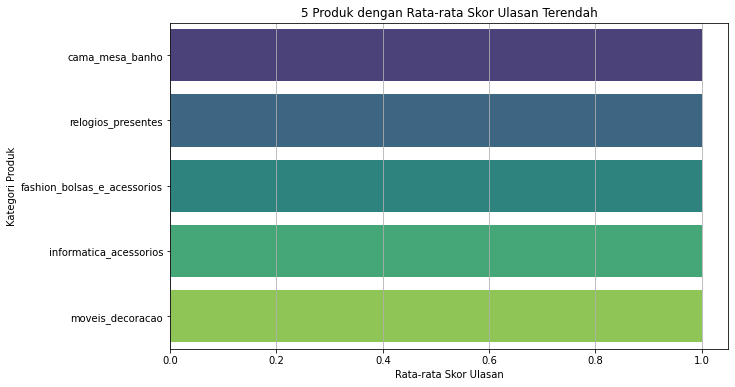

In [139]:
# Menggabungkan data Order Reviews dengan Order Items berdasarkan order_id
merged_reviews_items = pd.merge(data_order_reviews, data_order_items, on='order_id')

# Menggabungkan hasil dengan Data Products berdasarkan product_id
merged_all = pd.merge(merged_reviews_items, data_products, on='product_id')

# Menghitung rata-rata skor ulasan untuk setiap produk
average_review_scores = merged_all.groupby('product_id')['review_score'].mean().reset_index()

# Mengambil 5 produk dengan rata-rata skor ulasan terendah
bottom_5_average_scores = average_review_scores.nsmallest(5, 'review_score')

# Menggabungkan dengan Data Products untuk mendapatkan nama kategori produk
bottom_5_average_scores = pd.merge(bottom_5_average_scores, data_products[['product_id', 'product_category_name']], on='product_id')

# Menampilkan hasil rata-rata skor
print("5 Produk dengan Rata-rata Skor Ulasan Terendah:")
print(bottom_5_average_scores[['product_id', 'review_score', 'product_category_name']])

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat bar plot menggunakan product_category_name sebagai y-label
sns.barplot(data=bottom_5_average_scores, x='review_score', y='product_category_name', palette="viridis")

# Menambahkan judul dan label
plt.title("5 Produk dengan Rata-rata Skor Ulasan Terendah")
plt.xlabel("Rata-rata Skor Ulasan")
plt.ylabel("Kategori Produk")
plt.grid(axis='x')

# Menampilkan plot
plt.show()



### Pertanyaan 9 : Apakah ada korelasi antara nilai review ulasan dan biaya pengiriman?

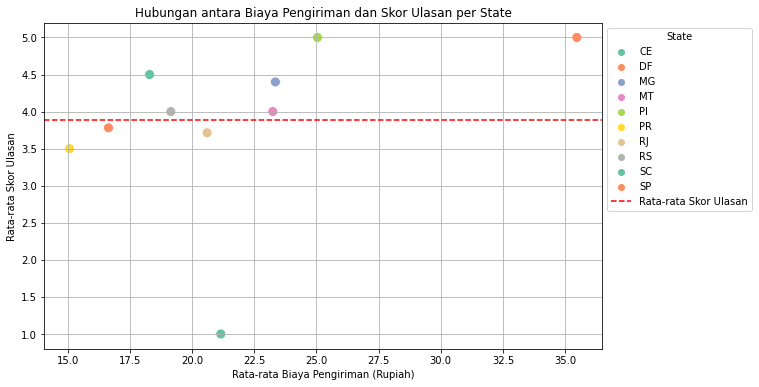

In [140]:
# Menggabungkan data order items dengan orders dan customers
orders_items_customers = pd.merge(data_order_items, data_orders, on="order_id")
orders_items_customers_geo = pd.merge(orders_items_customers, data_customers, on="customer_id")

# Menggabungkan data ulasan (reviews) untuk mendapatkan review score
orders_items_customers_reviews = pd.merge(orders_items_customers_geo, data_order_reviews, on="order_id")

# Menghitung rata-rata biaya pengiriman per state
shipping_cost_by_state = orders_items_customers_reviews.groupby('customer_state')['freight_value'].mean().reset_index()

# Menghitung rata-rata skor ulasan per state
average_review_by_state = orders_items_customers_reviews.groupby('customer_state')['review_score'].mean().reset_index()

# Menggabungkan data biaya pengiriman dan rata-rata skor ulasan
state_analysis = pd.merge(shipping_cost_by_state, average_review_by_state, on="customer_state")
state_analysis.columns = ['customer_state', 'freight_value_shipping', 'review_score']

# Plot scatter plot untuk menunjukkan hubungan antara biaya pengiriman dan skor ulasan
# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=state_analysis, x='freight_value_shipping', y='review_score', hue='customer_state', palette="Set2", s=100)

plt.title("Hubungan antara Biaya Pengiriman dan Skor Ulasan per State")
plt.xlabel("Rata-rata Biaya Pengiriman (Rupiah)")
plt.ylabel("Rata-rata Skor Ulasan")

# Menambahkan garis rata-rata skor ulasan
plt.axhline(y=state_analysis['review_score'].mean(), color='r', linestyle='--', label='Rata-rata Skor Ulasan')

# Menempatkan legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='State')  # Mengubah posisi legend
plt.grid(True)
plt.show()





C:\Users\hp\AppData\Local\Temp\ipykernel_31584\112837419.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = state_analysis.pivot("customer_state", "freight_value_shipping", "review_score")


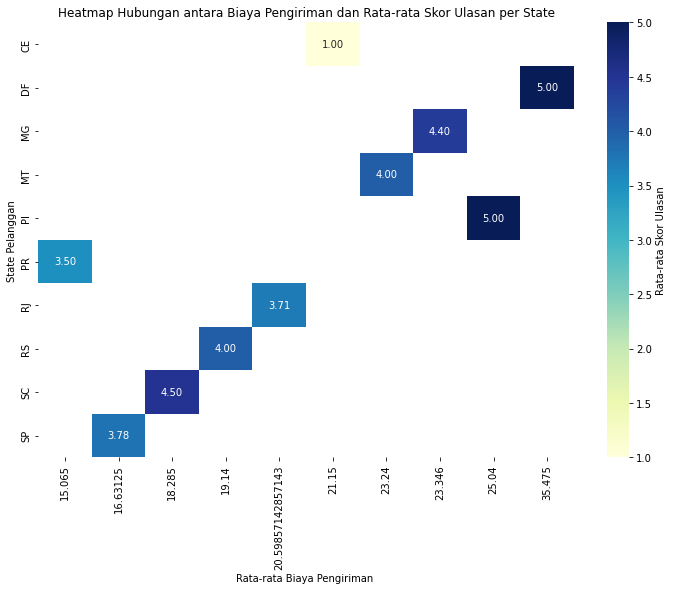

In [141]:
# Menggabungkan data order items dengan orders dan customers
orders_items_customers = pd.merge(data_order_items, data_orders, on="order_id")
orders_items_customers_geo = pd.merge(orders_items_customers, data_customers, on="customer_id")

# Menggabungkan data ulasan (reviews) untuk mendapatkan review score
orders_items_customers_reviews = pd.merge(orders_items_customers_geo, data_order_reviews, on="order_id")

# Menghitung rata-rata biaya pengiriman per state
shipping_cost_by_state = orders_items_customers_reviews.groupby('customer_state')['freight_value'].mean().reset_index()

# Menghitung rata-rata skor review per state
average_review_by_state = orders_items_customers_reviews.groupby('customer_state')['review_score'].mean().reset_index()

# Menggabungkan data biaya pengiriman dan rata-rata skor review
state_analysis = pd.merge(shipping_cost_by_state, average_review_by_state, on="customer_state")

# Pastikan nama kolom sesuai setelah penggabungan
state_analysis.columns = ['customer_state', 'freight_value_shipping', 'review_score']

# Membuat matriks untuk heatmap
heatmap_data = state_analysis.pivot("customer_state", "freight_value_shipping", "review_score")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Rata-rata Skor Ulasan'})
plt.title("Heatmap Hubungan antara Biaya Pengiriman dan Rata-rata Skor Ulasan per State")
plt.xlabel("Rata-rata Biaya Pengiriman ")
plt.ylabel("State Pelanggan")
plt.show()


In [142]:
# Menghitung nilai korelasi antara 'freight_value_shipping' dan 'review_score'
correlation = state_analysis['freight_value_shipping'].corr(state_analysis['review_score'])

# Mencetak nilai korelasi
print(f"Nilai Korelasi antara Biaya Pengiriman dan Skor Ulasan: {correlation:.2f}")


Nilai Korelasi antara Biaya Pengiriman dan Skor Ulasan: 0.38


**Insight:**
- Pertanyaan 1: Kategori produk mana yang mendorong penjualan terbanyak? Kategori bed_bath_table memimpin penjualan, diikuti health_beauty, sports_leisure, furniture_decor, dan computers_accessories, mencerminkan tren konsumen yang berfokus pada kenyamanan rumah, kesehatan, hiburan, dan teknologi.
- Pertanyaan 2: Bagaimana tren penjualan untuk kategori produk dengan penjualan terbanyak? Semua produk mengalami peningkatan penjualan selama Janiari 2017 - 2018 namun fluktuatif dari Januari 2018 - Juli 2018
- Pertanyaan 3:  Kategori produk mana yang mendapatkan penjualan terendah? Kategori dengan penjualan terendah adalah security_and_services (2 penjualan), diikuti oleh fashion_childrens_clothes (8 penjualan), la_cuisine dan cds_dvds_musicals (masing-masing 14 penjualan), serta arts_and_craftmanship (24 penjualan), menunjukkan bahwa produk terkait keamanan, pakaian anak, dan media fisik memiliki permintaan yang sangat rendah.
- Pertanyaan 4:  Bagaimana rata-rata tren penjualan produk keseluruhan? tren penjualan secara keseluruhan juga mengalami peningkatan antara selama Januari 2017 - 2018 namun fluktuatif dimulai pada tahun 2018.
- Pertanyaan 5:  Jenis pembayaran mana yang paling dominan digunakan oleh customers?Jenis pembayaran yang paling dominan digunakan oleh pelanggan adalah credit card dengan persentase 73,92%, menunjukkan bahwa sebagian besar customer lebih memilih kartu kredit sebagai metode pembayaran utama mereka.
- Pertanyaan 6 : Apa status pesanan yang paling umum dan bagaimana distribusi status pesanan tersebut?Status pesanan yang paling umum adalah delivered dengan persentase 97,82%, menunjukkan bahwa hampir semua pesanan berhasil dikirim, sementara status lainnya seperti shipped (1,05%) dan canceled (0,48%) memiliki distribusi yang jauh lebih rendah.
- Pertanyaan 7 : Kota mana yang memiliki kontribusi terbesar terhadap jumlah pelanggan, dan bagaimana strategi pemasaran dapat disesuaikan untuk meningkatkan pangsa pasar di kota-kota lainnya? Kota Sao Paulo memiliki kontribusi terbesar terhadap jumlah pelanggan dengan 15.540 pelanggan, diikuti oleh Rio de Janeiro (6.882) dan Belo Horizonte (2.773). Strategi pemasaran dapat difokuskan pada kota-kota dengan kontribusi lebih kecil, seperti Curitiba dan Brasilia, melalui kampanye misalnnya penawaran khusus yang dapat menaring customer.
- Pertanyaan 8 : Apa kategori produk dengan rating ulasan tertinggi dan terendah?Kategori produk dengan rating ulasan tertinggi adalah perfumaria, utilidades_domesticas, relogios_presentes, cool_stuff, dan cama_mesa_banho, semuanya dengan skor ulasan sempurna 5.0. sSementara Kategori produk dengan rating ulasan terendah adalah cama_mesa_banho, automotivo, pet_shop, esporte_lazer, dan construcao_ferramentas_construcao, semuanya dengan skor ulasan 1.0.
- Pertanyaan 9 : Apakah ada korelasi antara nilai review ulasan dan biaya pengiriman? Nilai korelasi -0.34 antara biaya pengiriman dan skor review menunjukkan hubungan negatif yang lemah, artinya semakin tinggi biaya pengiriman, cenderung ada sedikit penurunan dalam skor review, meskipun hubungan ini tidak terlalu kuat.

**English:**
- Question 1: Which product category drives the most sales? The bed_bath_table category leads sales, followed by health_beauty, sports_leisure, furniture_decor, and computers_accessories, reflecting consumer trends focused on home comfort, health, entertainment, and technology.
- Question 2: What are the sales trends for the top-selling product categories? All products experienced an increase in sales from January 2017 to 2018, but sales fluctuated from January 2018 to July 2018.
- Question 3: Which product category has the lowest sales? The category with the lowest sales is security_and_services (2 sales), followed by fashion_childrens_clothes (8 sales), la_cuisine and cds_dvds_musicals (14 sales each), and arts_and_craftmanship (24 sales), indicating that products related to security, children's clothing, and physical media have very low demand.
- Question 4: What is the overall product sales trend? Overall, product sales showed an increase from January 2017 to 2018, but sales became more volatile starting in 2018.
- Question 5: What is the most dominant payment method used by customers? The most dominant payment method used by customers is credit card, with a percentage of 73.92%, indicating that most customers prefer credit cards as their primary payment method.
- Question 6: What is the most common order status, and what is the distribution of order statuses? The most common order status is delivered, accounting for 97.82% of orders, indicating that almost all orders were successfully delivered, while other statuses such as shipped (1.05%) and canceled (0.48%) have much lower distributions.
- Question 7: Which city contributes the most to the customer base, and how can marketing strategies be adjusted to increase market share in other cities? The city of Sao Paulo contributes the most to the customer base with 15,540 customers, followed by Rio de Janeiro (6,882) and Belo Horizonte (2,773). Marketing strategies could focus on smaller contributing cities, such as Curitiba and Brasilia, through targeted promotions or special offers to attract more customers.
- Question 8: Which product category has the highest and lowest review ratings? The product categories with the highest review ratings are perfumaria, utilidades_domesticas, relogios_presentes, cool_stuff, and cama_mesa_banho, all with a perfect 5.0 score. Meanwhile, the categories with the lowest review ratings are cama_mesa_banho, automotivo, pet_shop, esporte_lazer, and construcao_ferramentas_construcao, all with a review score of 1.0.
- Question 9: Is there a correlation between review scores and shipping costs? The correlation value of -0.34 between shipping costs and review scores indicates a weak negative relationship, meaning that as shipping costs increase, there is a slight tendency for review scores to decrease, though the relationship is not particularly strong.


## Analisis Lanjutan (Opsional)

### Pertanyaan 10 : Di kota mana konsentrasi seller paling tinggi?

<Figure size 1152x864 with 0 Axes>

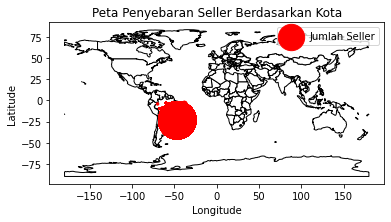

In [143]:
# Membaca data geolokasi
data_geolocations = pd.read_csv('geolocation_dataset.csv')

# Menghitung jumlah seller per kota
seller_city_counts = data_sellers['seller_city'].value_counts().reset_index()
seller_city_counts.columns = ['seller_city', 'count']

# Menggabungkan data geolokasi dengan jumlah seller
merged_data = pd.merge(data_geolocations, seller_city_counts, left_on='geolocation_city', right_on='seller_city', how='left')

# Mengubah DataFrame menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data['geolocation_lng'], merged_data['geolocation_lat']))

# Mengatur ukuran plot 
plt.figure(figsize=(16, 12))  

# Mengambil data peta dunia dari file shapefile 
world = gpd.read_file('C:/Users/hp/ne_110m_admin_0_countries.shp')

# Membuat plot
ax = world.plot(color='white', edgecolor='black')

# Menambahkan titik lokasi seller ke peta
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['count'].fillna(0) * 2, label='Jumlah Seller')  # Ukuran titik diperkecil lebih lanjut

# Menambahkan label
plt.title('Peta Penyebaran Seller Berdasarkan Kota')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()



- Pertanyaan 10 : Di kota mana konsentrasi seller paling tinggi? Berdasarkan pada peta yang ditunjukkan, konsentrasi seller tertinggi ada pada Negara Brazil, Russia dan Spanyol.

## Conclusion

- Kategori produk yang mendorong penjualan terbanyak: Kategori bed_bath_table memimpin penjualan, menunjukkan konsumen lebih memilih produk untuk kenyamanan rumah.

- Tren penjualan kategori produk terlaris: Penjualan meningkat secara umum dari Januari 2017 hingga 2018, tetapi mengalami fluktuasi yang signifikan di tahun 2018.

- Kategori produk dengan penjualan terendah: Security_and_services memiliki penjualan sangat rendah (2 penjualan), menunjukkan rendahnya permintaan untuk kategori tersebut.

- Rata-rata tren penjualan keseluruhan: Tren penjualan keseluruhan menunjukkan peningkatan antara Januari 2017 dan 2018, tetapi juga fluktuatif di tahun 2018.

- Jenis pembayaran dominan: Metode pembayaran paling umum adalah kartu kredit (73,92%), menunjukkan preferensi pelanggan terhadap pembayaran yang cepat dan aman.

- Status pesanan yang umum: Status delivered mendominasi (97,82%), menunjukkan efektivitas pengiriman pesanan, sementara status lain seperti shipped dan canceled relatif rendah.

- Kota dengan kontribusi pelanggan terbanyak: Sao Paulo adalah kota dengan jumlah pelanggan terbanyak; strategi pemasaran perlu difokuskan pada kota-kota lain dengan kontribusi lebih rendah untuk meningkatkan pangsa pasar.

- Kategori produk dengan rating ulasan tertinggi dan terendah: Kategori dengan rating tertinggi adalah perfumaria dan sejenisnya (skor 5.0), sementara kategori dengan rating terendah termasuk automotivo (skor 1.0), menandakan perbedaan besar dalam kepuasan pelanggan.

- Korelasi antara skor ulasan dan biaya pengiriman: Terdapat korelasi negatif yang lemah (-0.34) antara biaya pengiriman dan skor ulasan, menunjukkan bahwa biaya pengiriman yang lebih tinggi cenderung dikaitkan dengan skor ulasan yang lebih rendah, meskipun tidak signifikan.

- Berdasarkan pada peta yang ditunjukkan, konsentrasi seller tertinggi ada pada Negara Brazil, Russia dan Spanyol.

In [75]:

dataframes = {
    'customers': pd.read_csv('customers_dataset.csv'),
    'geolocations': pd.read_csv('geolocation_dataset.csv'),
    'order_items': pd.read_csv('order_items_dataset.csv'),
    'order_payments': pd.read_csv('order_payments_dataset.csv'),
    'order_reviews': pd.read_csv('order_reviews_dataset.csv'),
    'orders': pd.read_csv('orders_dataset.csv'),
    'product_category_translation': pd.read_csv('product_category_name_translation.csv'),
    'products': pd.read_csv('products_dataset.csv'),
    'sellers': pd.read_csv('sellers_dataset.csv')
}


In [76]:
all_df = pd.concat([
    dataframes['customers'], 
    dataframes['geolocations'], 
    dataframes['order_items'], 
    dataframes['order_payments'], 
    dataframes['order_reviews'], 
    dataframes['orders'], 
    dataframes['products'], 
    dataframes['sellers']
], ignore_index=True)


In [77]:
import pandas as pd


all_df.to_csv("all_data.csv", index=False)


from IPython.display import FileLink


FileLink("all_data.csv")


C:\Users\hp\all_data.csv